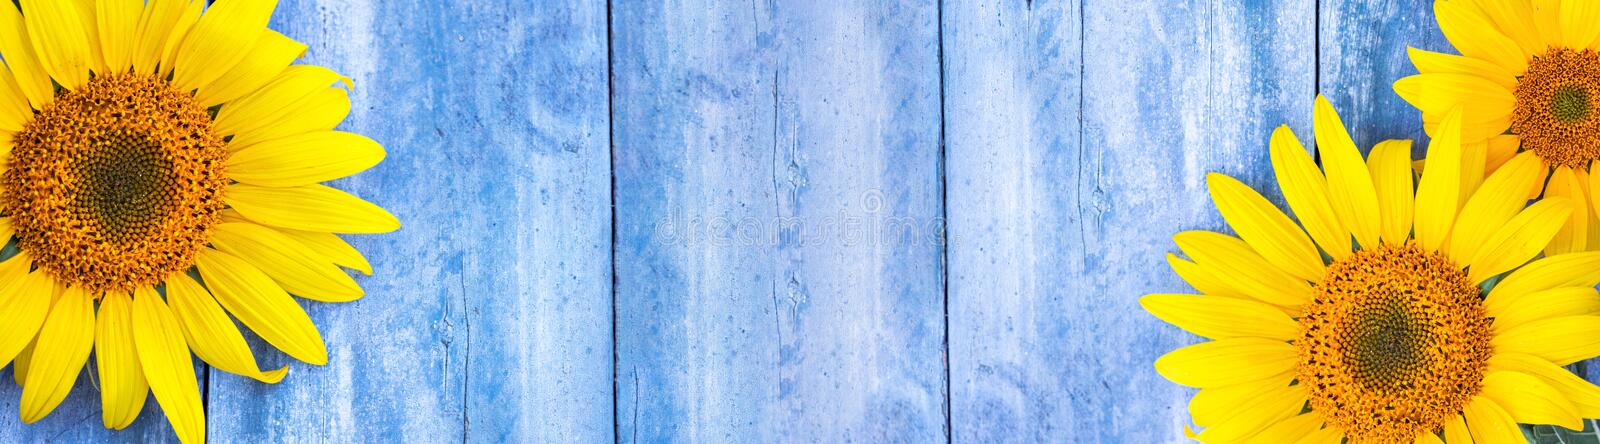

<center>
    
    
 ## Sunflowers Or Roses? - A Machine Learning Clustering Project
    
___


<center>

##### Pablo de la Asunción Cumbrera Conde


### Índice

 - Libraries
 - Dataset & Visualization
 - Model Developing (1st stage)
 - Model Developing (2nd stage)
 - Results
 - Ackowledges

#### Libraries
____

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import os
import sys
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
conf = r'-- oem 2'

#### Dataset & Visualization
____

In [1]:
data_path = r"C:\Users\pablo\Downloads\technical_test_images"

#for dirname, _, filenames in os.walk(data_path):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

In [3]:
DataFrame = {
    'photo_name' : [],
    'flattenPhoto' : [],
    }

Archivo guardado en flowergrid.pdf'


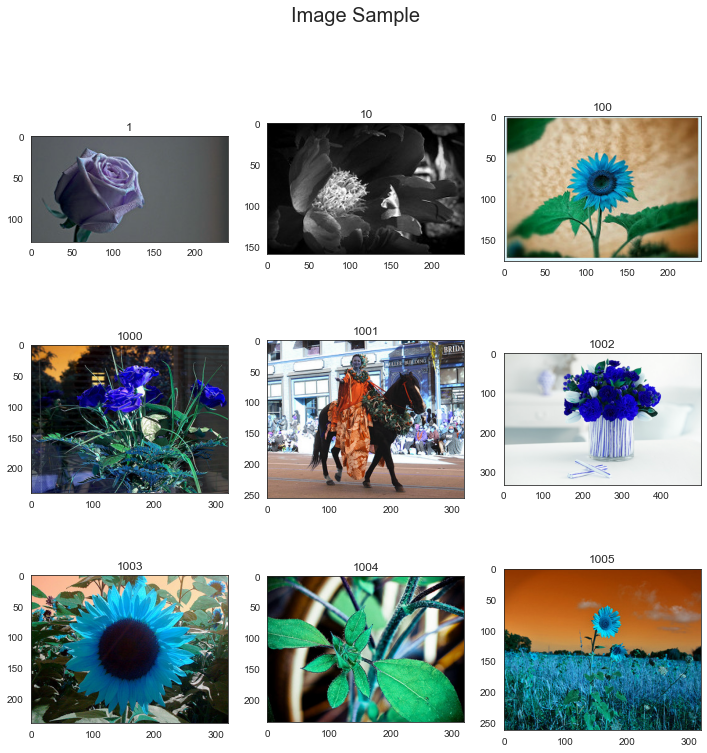

In [35]:
im1 = cv2.imread(r"C:\Users\pablo\Downloads\technical_test_images\imagen1.jpg")
im2= cv2.imread(r"C:\Users\pablo\Downloads\technical_test_images\imagen10.jpg")
im3= cv2.imread(r"C:\Users\pablo\Downloads\technical_test_images\imagen100.jpg")
im4= cv2.imread(r"C:\Users\pablo\Downloads\technical_test_images\imagen1000.jpg")
im5= cv2.imread(r"C:\Users\pablo\Downloads\technical_test_images\imagen1001.jpg")
im6= cv2.imread(r"C:\Users\pablo\Downloads\technical_test_images\imagen1002.jpg")
im7= cv2.imread(r"C:\Users\pablo\Downloads\technical_test_images\imagen1003.jpg")
im8= cv2.imread(r"C:\Users\pablo\Downloads\technical_test_images\imagen1004.jpg")
im9= cv2.imread(r"C:\Users\pablo\Downloads\technical_test_images\imagen1005.jpg")


sns.set_style("white")
fig = plt.figure(figsize=(12,12))
plt.suptitle("Image Sample", fontsize=20)

plt.subplot(331)
plt.title('1')
plt.imshow(im1)

plt.subplot(332)
plt.title('10')
plt.imshow(im2)

plt.subplot(333)
plt.title('100')
plt.imshow(im3)

plt.subplot(334)
plt.title('1000')
plt.imshow(im4)

plt.subplot(335)
plt.title('1001')
plt.imshow(im5)

plt.subplot(336)
plt.title('1002')
plt.imshow(im6)

plt.subplot(337)
plt.title('1003')
plt.imshow(im7)

plt.subplot(338)
plt.title('1004')
plt.imshow(im8)

plt.subplot(339)
plt.title('1005')
plt.imshow(im9)

plt.savefig("flowergrid.pdf")

print("Archivo guardado en flowergrid.pdf'")

#### Model Developing (1st stage)
____

In [4]:
MyModel = tf.keras.models.Sequential()
MyModel.add(tf.keras.applications.ResNet101(
    include_top = False, weights='imagenet',    pooling='avg',
))

In [20]:
# Freeze 1st layer weights
MyModel.layers[0].trainable = False

In [6]:
### Data Loading Function
def LoadData(path, h, w):
    img = cv2.imread(path)
    img = cv2.resize(img, (h, w))
    
    ## Expanding image dims so this represents 1 sample
    img = img = np.expand_dims(img, 0)
    
    img = tf.keras.applications.resnet50.preprocess_input(img)
    extractedFeatures = MyModel.predict(img)
    extractedFeatures = np.array(extractedFeatures)
    DataFrame['flattenPhoto'].append(extractedFeatures.flatten())

In [2]:
### Iterative Loop
def Read_Store_imgs(data_path):
    list_ = os.listdir(data_path)

    for mem in list_:
        DataFrame['photo_name'].append(mem)
        imagePath = data_path + '/' + mem
        LoadData(imagePath, 224, 224)

In [8]:
#Start

Read_Store_imgs(data_path)

#### Model Developing (2nd stage)
____

In [9]:
Training_Feature_vector = np.array(DataFrame['flattenPhoto'], dtype = 'float64')
from sklearn.cluster import AgglomerativeClustering
kmeans = AgglomerativeClustering(n_clusters = 2)
kmeans.fit(Training_Feature_vector)

AgglomerativeClustering()

In [39]:
predictions = kmeans.labels_
NamePred = []
for mem in predictions:
    if mem == 0:
        NamePred.append('Sunflower')
    else:
        NamePred.append('Rose')

#### Results
____

In [46]:
names = DataFrame['photo_name']
df = {
    'Image' : names,
    'Image Class' : NamePred,
}
flowers = pd.DataFrame(df)
flowers.to_csv('flowerprediction.csv', index = False)
print("Archive saved as: 'flowerprediction.csv'")

Archive saved as: 'flowerprediction.csv'


In [47]:
flowers.head(50)

,Image,Image Class
0,imagen1.jpg,Rose
1,imagen10.jpg,Rose
2,imagen100.jpg,Sunflower
3,imagen1000.jpg,Sunflower
4,imagen1001.jpg,Sunflower
5,imagen1002.jpg,Sunflower
6,imagen1003.jpg,Sunflower
7,imagen1004.jpg,Sunflower
8,imagen1005.jpg,Sunflower
9,imagen1006.jpg,Sunflower


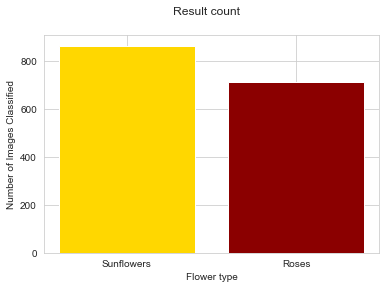

Sunflower    864
Rose         712
Name: Image Class, dtype: int64


In [86]:
sns.set_style("whitegrid")

# Make a random dataset:
height = [flowers["Image Class"].value_counts()[0], flowers["Image Class"].value_counts()[1]]
bars = ('Sunflowers', 'Roses')
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height, color=['gold','darkred'])

# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.suptitle("Result count")
plt.xlabel("Flower type")
plt.ylabel("Number of Images Classified")

# Show graphic
plt.show()

print(flowers["Image Class"].value_counts())


Showing image to test results:
Image          imagen104.jpg
Image Class             Rose
Name: 46, dtype: object


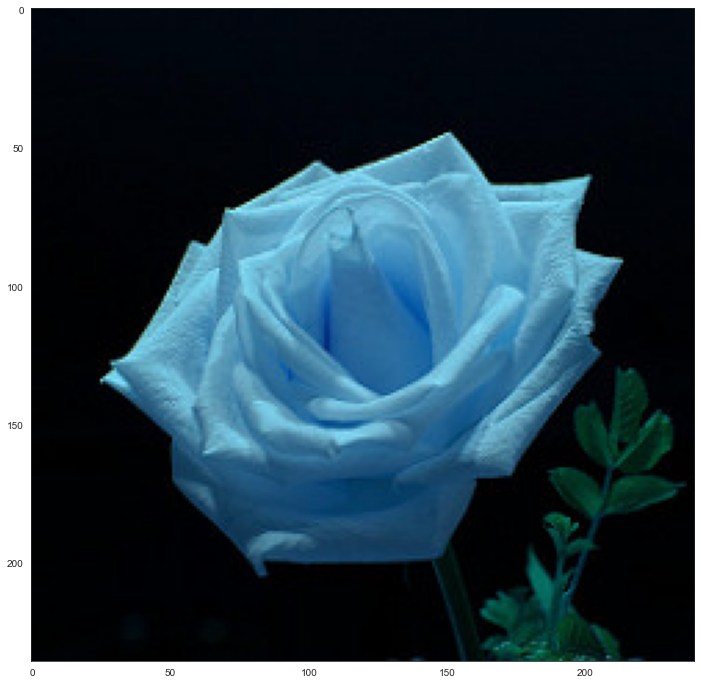

In [64]:
#Testing Results
img_path1 = r"C:\Users\pablo\Downloads\technical_test_images\imagen104.jpg"

im = cv2.imread(img_path1)
print("Showing image to test results:")
print(flowers.loc[46])
fig = plt.figure(figsize=(12,12))
plt.imshow(im)

#### Acknowledges
____

Analytics Vidhya:
An Approach towards Neural Network based Image Clustering
Ritwek Khosla — December 14, 2020 https://www.analyticsvidhya.com/blog/2020/12/an-approach-towards-neural-network-based-image-clustering/

Kaggle: Keep Babies Safe Dataset Notebooks
https://www.kaggle.com/akash14/keep-babies-safe/code